In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
all_stats = np.load('diemer500_Reid.npz')

In [3]:
all_stats.keys()

['ngals', 'rp', 'deltasigma', 'param']

In [4]:
rp = all_stats['rp'][0]
print rp

[  0.05282343   0.08333484   0.13146998   0.20740853   0.32721003
   0.51621023   0.81437908   1.28477361   2.02687332   3.1976182
   5.0445985    7.95841545  12.5552859 ]


In [11]:
def A_to_index(Acen,Asat):
    idx0 = (Acen+1.)/0.05*41+(Asat+1.)/0.05
    index = np.arange(10)*1681+int(np.round(idx0))
    return index

In [6]:
ds = all_stats['deltasigma']

[]

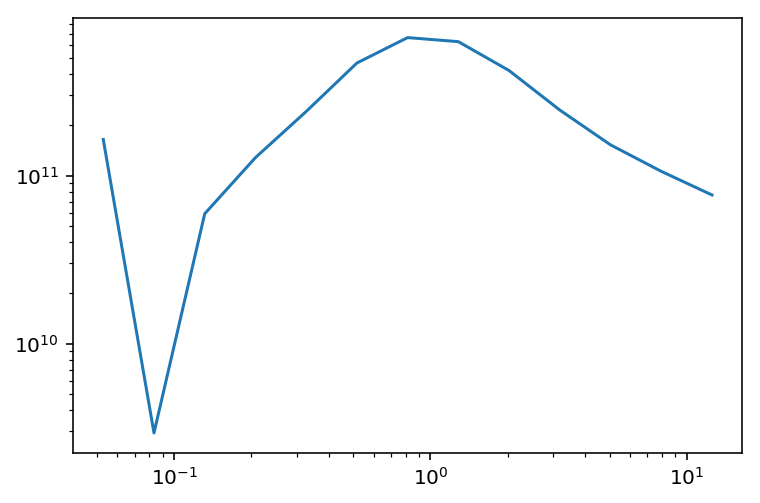

In [7]:
plt.plot(rp,ds[A_to_index(0,0)[0]])
plt.loglog()

In [8]:
ds[A_to_index(0,0)[0]]

array([  1.64003032e+11,   2.94074164e+09,   5.92582170e+10,
         1.27897434e+11,   2.40504732e+11,   4.67331040e+11,
         6.62144474e+11,   6.26165961e+11,   4.21443596e+11,
         2.45303715e+11,   1.52286374e+11,   1.05947773e+11,
         7.66427658e+10])

In [12]:
standard_ds = np.mean(ds[A_to_index(0,0)],axis=0)

In [13]:
def ratio_at_r(Acen,Asat,rp_i):
    ratio = np.mean(ds[A_to_index(Acen,Asat)],axis=0)[rp_i]/standard_ds[rp_i]
    return ratio

In [14]:
ratio_all = np.zeros((13,41,41))

In [15]:
for i in range(13):
    for j in range(41):
        for k in range(41):
            ratio_all[i,j,k] = ratio_at_r(-1+0.05*j,-1+0.05*k,i)

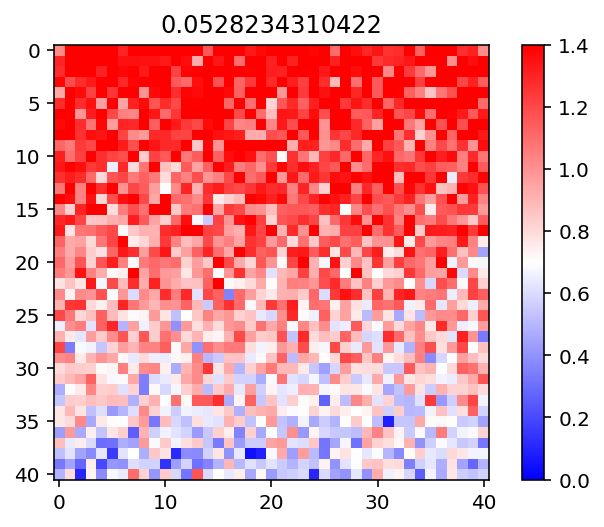

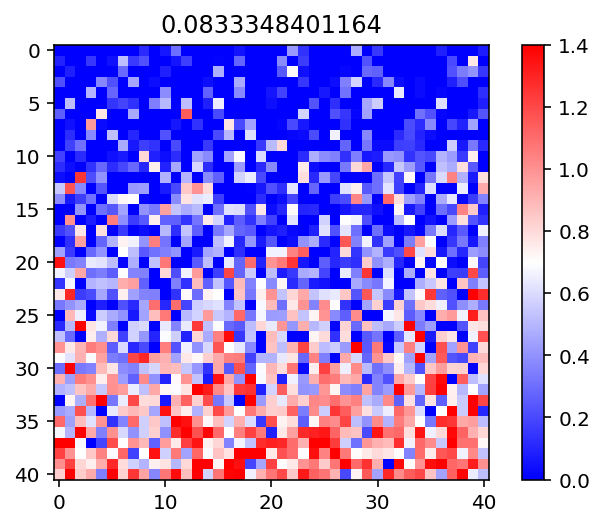

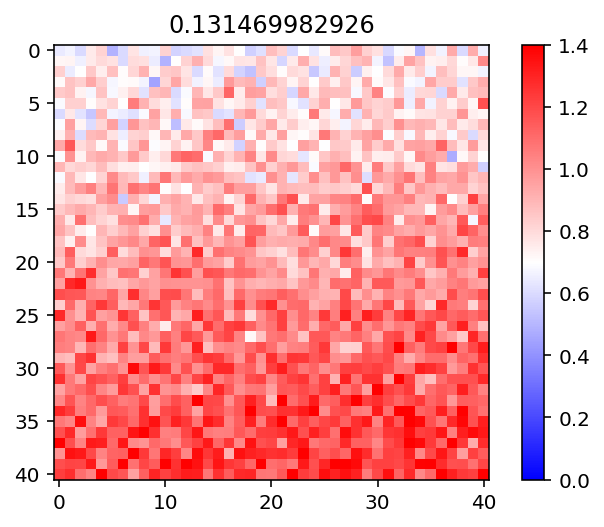

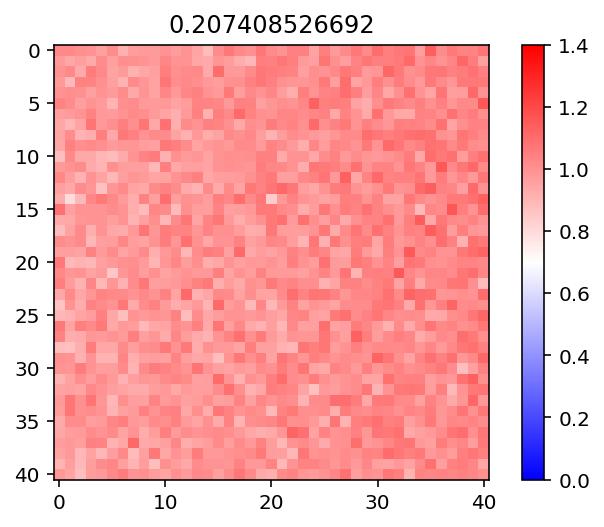

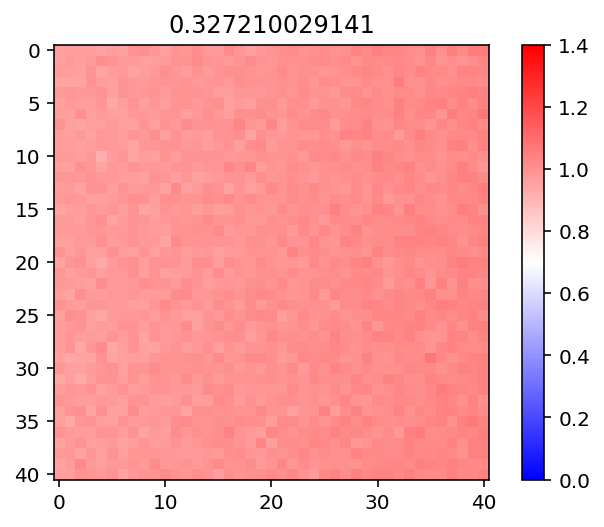

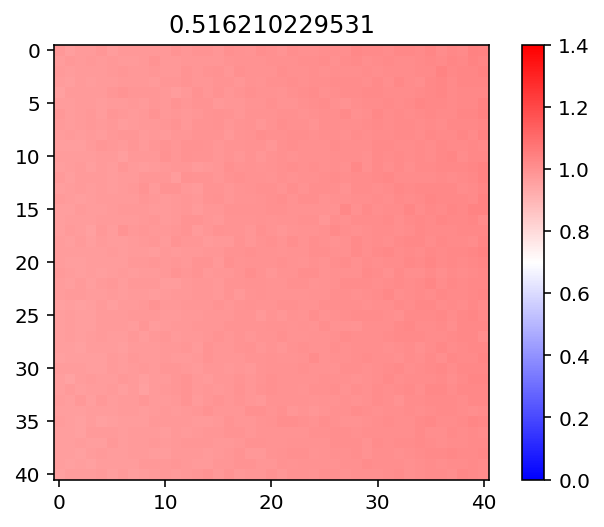

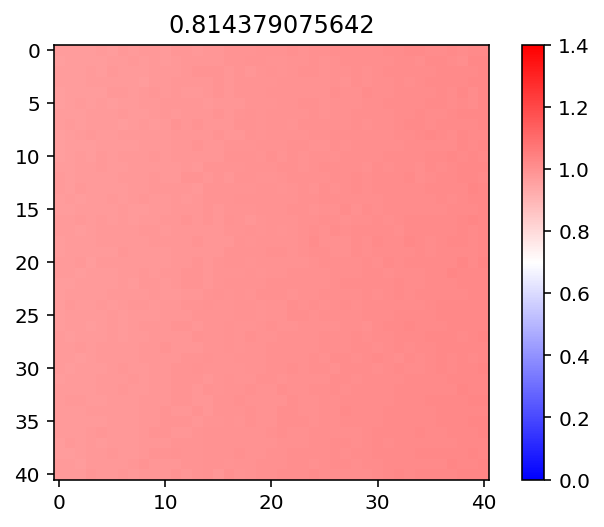

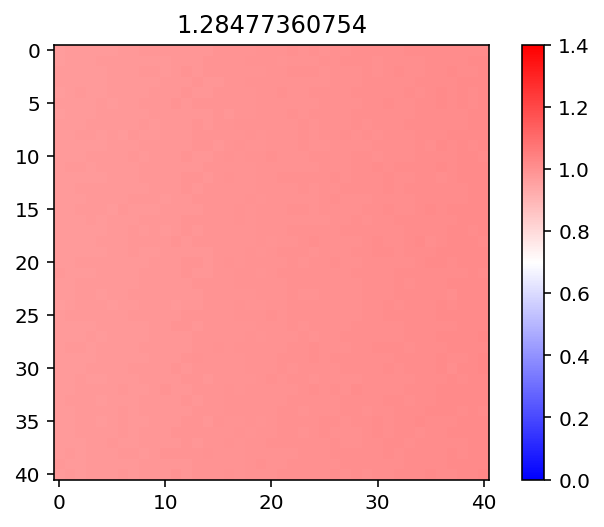

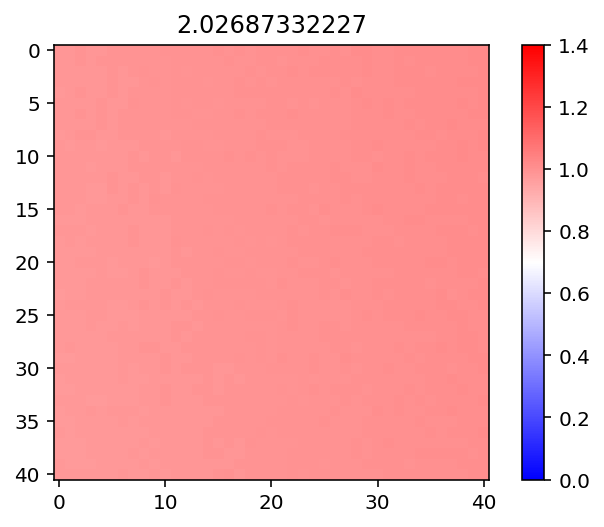

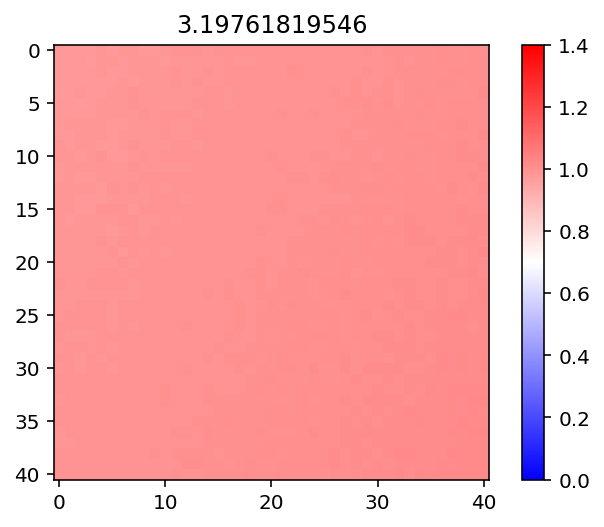

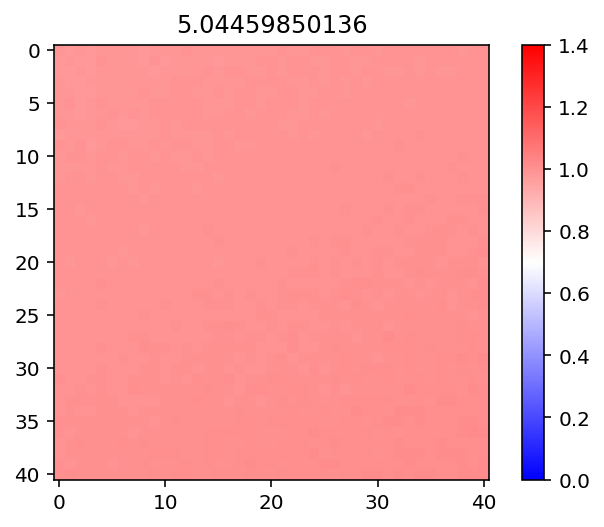

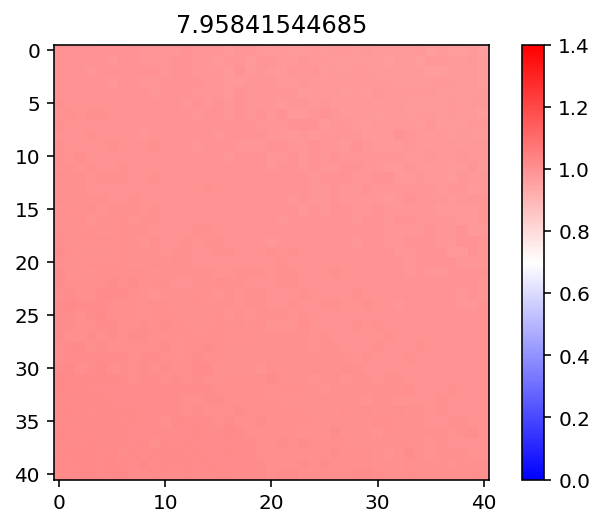

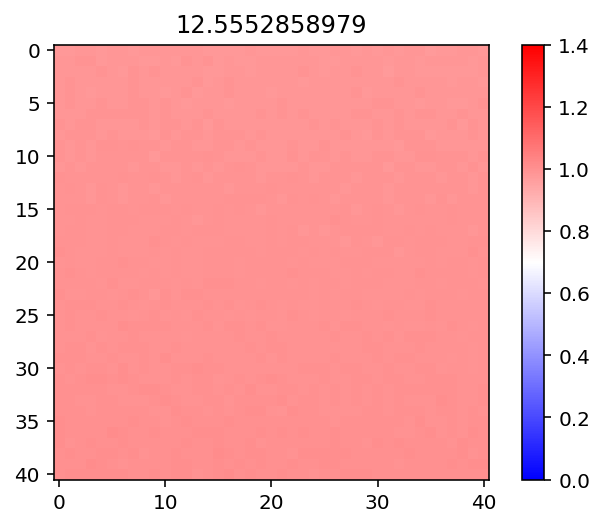

In [16]:
for i in range(13):
    plt.figure()
    plt.imshow(ratio_all[i],cmap='bwr',vmin=0,vmax=1.4,interpolation='None')
    plt.colorbar()
    plt.title(rp[i])

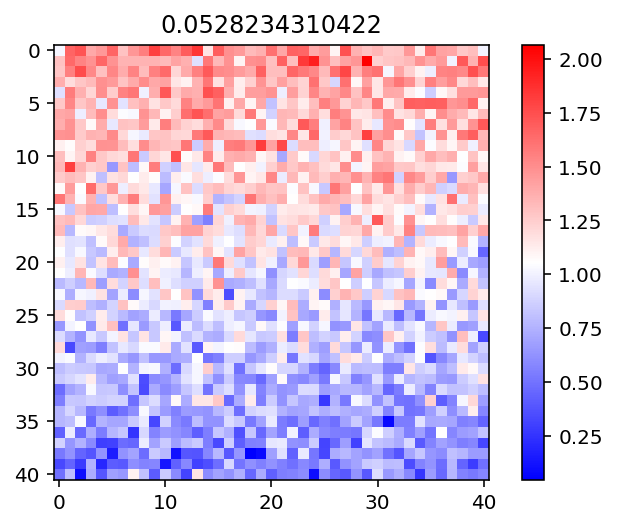

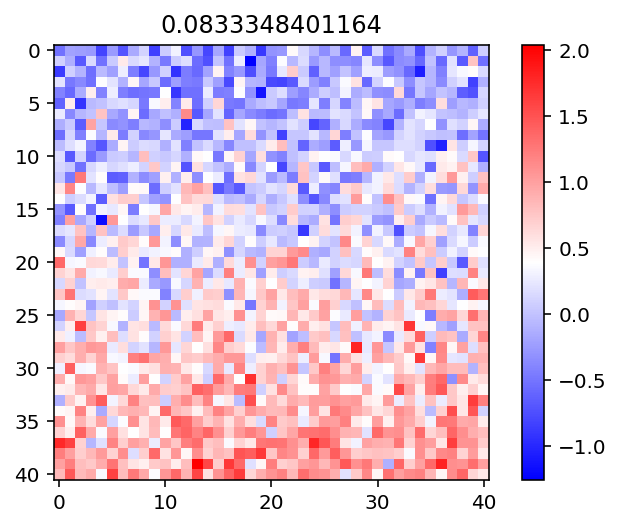

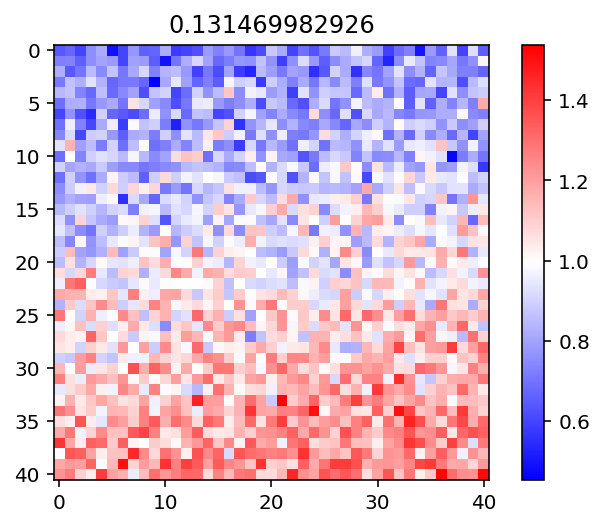

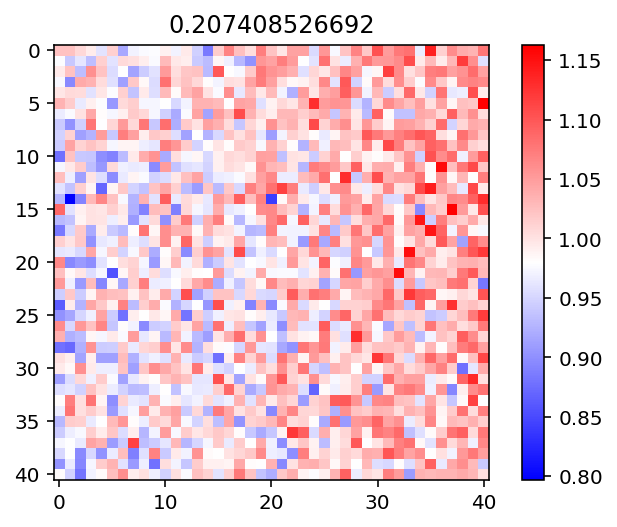

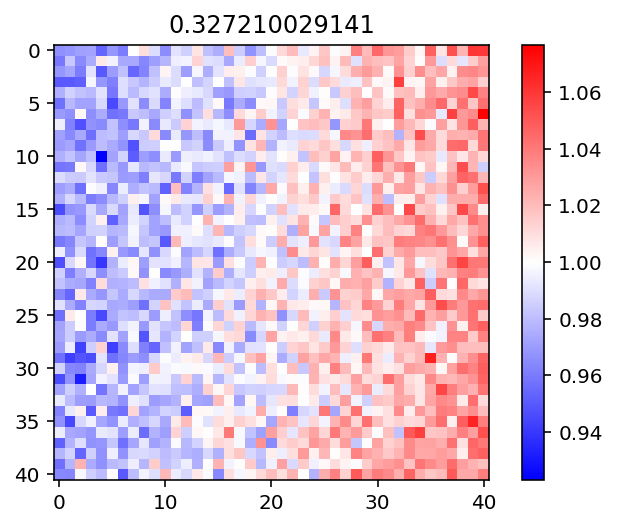

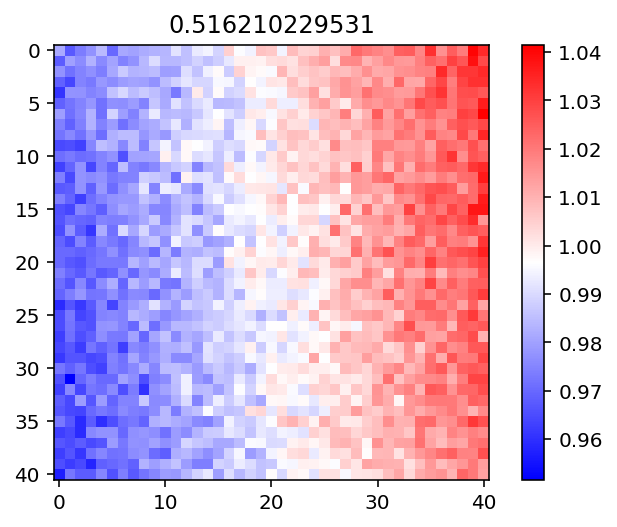

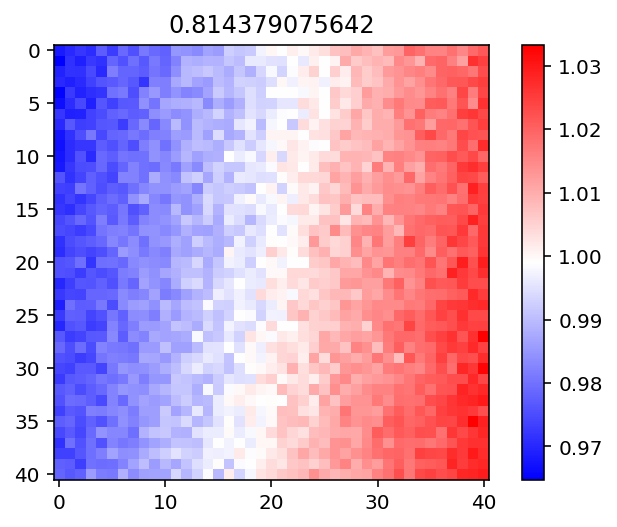

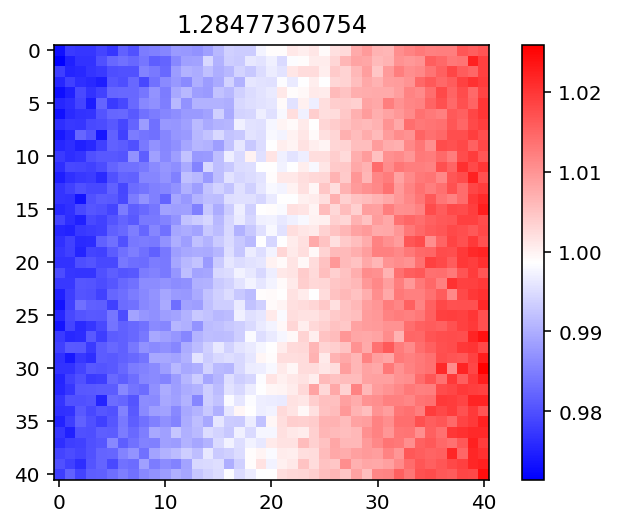

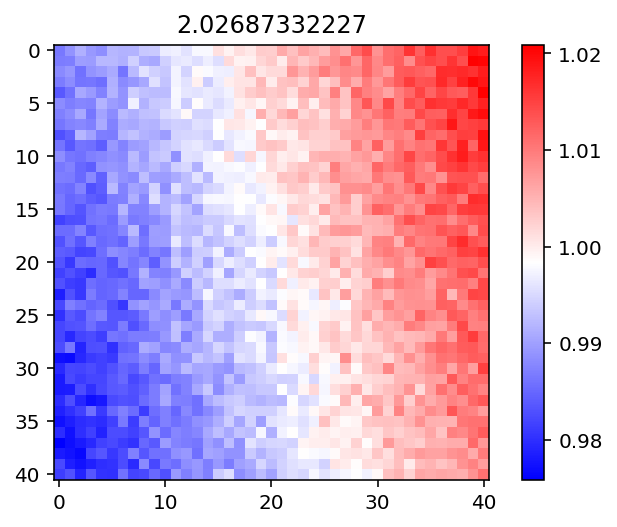

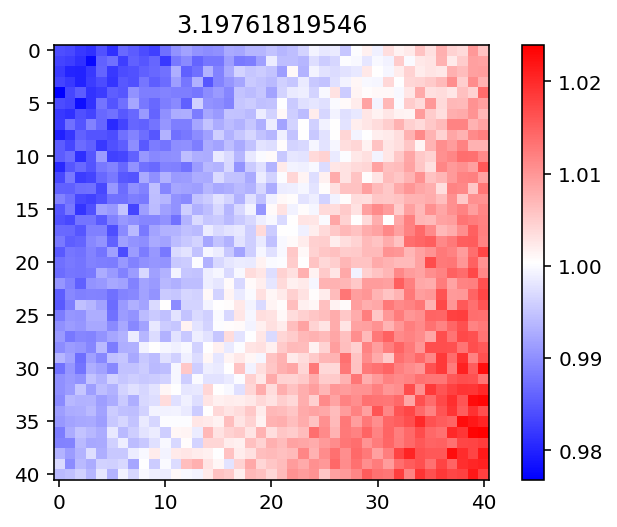

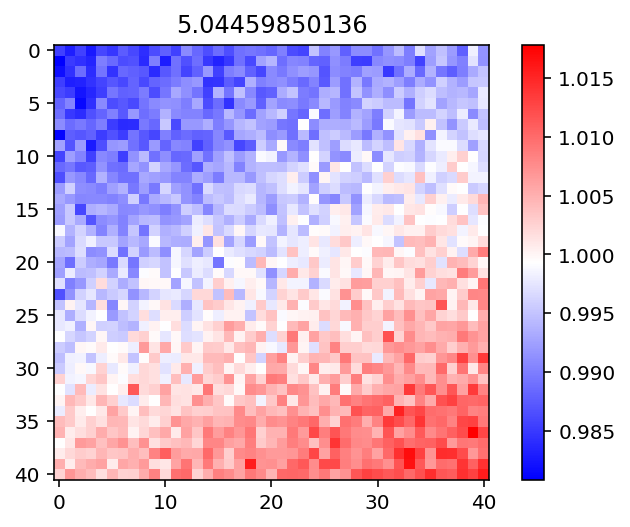

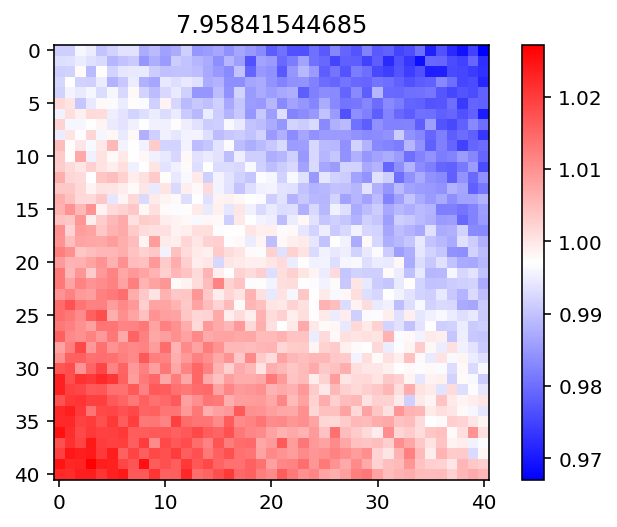

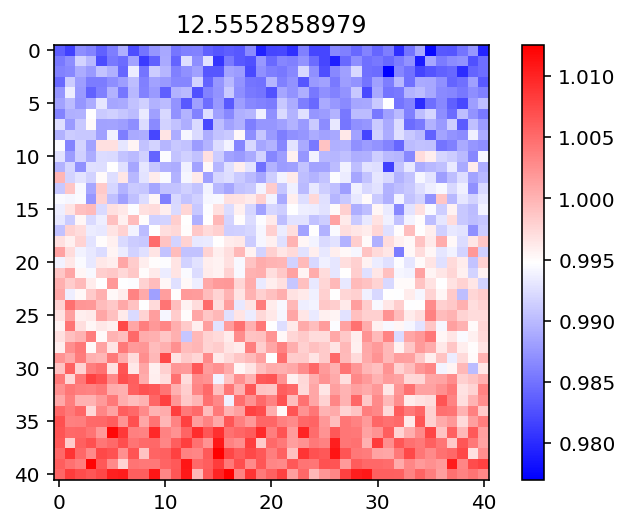

In [17]:
for i in range(13):
    plt.figure()
    plt.imshow(ratio_all[i],cmap='bwr',interpolation='None')
    plt.colorbar()
    plt.title(rp[i])